In [17]:
%matplotlib inline

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("poster")

In [20]:
dfg = pd.read_csv("ghcn_mos_lookup.csv")
mos_gdf = gpd.GeoDataFrame(dfg[['Station', 'Latitude', 'Longitude']], 
                            geometry=gpd.points_from_xy(dfg['Longitude'], dfg['Latitude']))
ghcn_gdf = gpd.GeoDataFrame(dfg[['ID', 'LATITUDE', 'LONGITUDE']], 
                            geometry=gpd.points_from_xy(dfg['LONGITUDE'], dfg['LATITUDE']))

In [21]:
df = pd.read_csv('ALL_2019.csv')
df.head()

,Unnamed: 0,station,ID,DATE,TMP,TMP_0:06,TMP_0:09,TMP_0:12,TMP_0:15,TMP_0:18,...,TMP_1:15,TMP_1:18,TMP_1:21,TMP_2:00,TMP_2:03,TMP_2:06,TMP_2:09,TMP_2:12,TMP_2:18,TMP_3:00
0,0,KABE,USW00014737,2019-03-01,-7,30.00,30.75,31.25,32.50,33.25,...,37.00,37.00,36.75,35.75,35.75,34.25,35.00,34.75,33.25,33.00
1,1,KABE,USW00014737,2019-03-02,14,34.75,36.00,36.00,35.25,34.50,...,36.50,36.00,35.25,34.25,34.00,33.25,32.00,30.25,28.00,25.50
2,2,KABE,USW00014737,2019-03-03,17,35.25,36.50,36.00,36.00,34.50,...,27.00,25.00,24.50,22.75,23.00,21.75,22.25,21.75,22.75,22.50
3,3,KABE,USW00014737,2019-03-04,11,33.50,31.00,29.00,27.00,26.00,...,22.75,22.75,22.50,21.25,21.50,21.00,21.25,21.25,21.50,22.25
4,4,KABE,USW00014737,2019-03-05,-52,19.75,21.75,21.75,22.50,22.50,...,21.25,21.00,22.00,22.00,23.25,23.25,24.25,24.25,25.25,25.50


In [22]:
mos_stations = mos_gdf[mos_gdf['Station'].isin(df['station'].unique())]
ghcn_stations = ghcn_gdf[ghcn_gdf['ID'].isin(df['ID'].unique())]

In [37]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


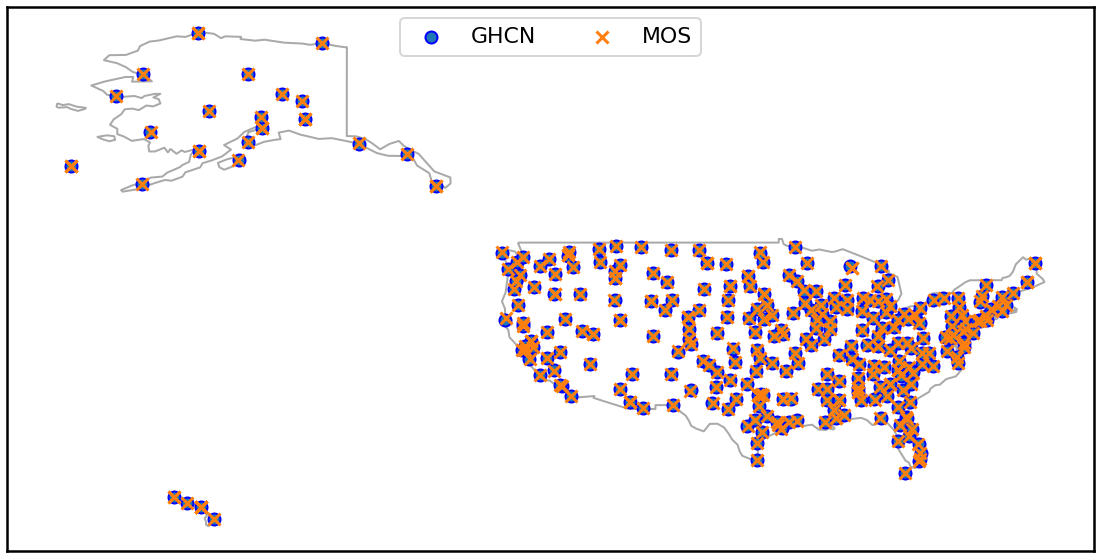

In [67]:
fig, ax = plt.subplots(figsize=(20,10))
world[world['iso_a3'].str.match('USA')].plot(ax=ax, color='white', edgecolor='darkgrey')
ghcn_stations.plot(ax=ax, edgecolor='blue', alpha=1, label='GHCN', zorder=9)
mos_stations.plot(ax=ax, edgecolor='red', marker='x', alpha=1, label='MOS', zorder=10)
ax.legend(ncol=2, loc='upper center')
ax.set(xticks=[], yticks=[])
ax.tick_params('both', length=0)
fig.savefig("map.png")